# UK Road Traffic Accidents 

<img src="/work/media/1617925592_maxresdefault.jpg">

The goal of this project is to analyse accidents and traffic data in the United Kingdom.The data are available for download on [link to data](https://data.world/datagov-uk/6efe5505-941f-45bf-b576-4c1e09b579a1) and contain UK government records of accidents from 2009 to 2018.Using python and its modules pandas, numpy, glob, folium and seaborn we will visualise different aspects of the data and try to get some insight into trends and evolution of accidents and traffic in the UK.

.The datasets contains 15 features,
- Reference Number
- Easting
- Northing 
- Number of Vehicles
- Accident Date
- Time (24hr)
- 1st Road Class
- Road Surface
- Lighting Conditions
- Weather Conditions
- Casualty Class
- Casualty Class.1
- Casualty Severity
- Sex of Casualty
- Age of Casualty
- Type of Vehicle

Among these features there are two geospatial specific features namely eastings and northings of accidents.Given the easting and northing of a location, we can calculate the latitude and longitude of the location and vice versa.

All of the above features are making very interesting and comprehensive  for analysis and research.




## Importing  and Merging



### Importing the necessary libraries

In [1]:
!pip install convertbng==0.6.32

In [2]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import folium
from convertbng.util import convert_lonlat
#from pandas_profiling import ProfileReport
%matplotlib inline




### Reading data files and Data Cleaning
- As shown below, there are discrepencies with the column names
- We are editing the individual csv files before merging them


#### Data for 2009
- We are taking this file as the base file to edit the next years of data.
- By base file, it is meant that, the column names and data types will be identical to this file. 

In [3]:
data_2009 = pd.read_csv("data/2009-9.csv",encoding='cp1252')

In [4]:
data_2009.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,3309,429093,436258,1,01-Jan-09,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,2609,434723,435534,1,02-Jan-09,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,2809,441173,433047,1,02-Jan-09,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,3809,428487,431364,1,02-Jan-09,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,3909,425928,435480,2,02-Jan-09,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


In [5]:
data_2009.shape

(3057, 15)

#### Data for 2010
- No changes made, identical with base file (2009)

In [6]:
data_2010 = pd.read_csv("data/2010-3.csv",encoding='cp1252')

In [7]:
data_2010.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,10BA0000011,430408,437054,2,01-Jan-10,1650,Unclassified,Wet / Damp,Darkness: street lights present and lit,Snowing without high winds,Driver,Slight,Female,62,Car
1,10BA0000014,435011,436276,2,01-Jan-10,205,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Male,36,Goods vehicle 3.5 tonnes mgw and under
2,10BA0000037,430429,437764,1,01-Jan-10,124,Unclassified,Frost/ Ice,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,34,Goods vehicle 3.5 tonnes mgw and under
3,10BA0000064,429002,436842,2,01-Jan-10,550,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Driver,Slight,Male,27,Car
4,10CA0000023,429399,433811,2,01-Jan-10,1825,A(M),Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Driver,Slight,Male,18,Car


In [8]:
data_2010.shape


(2765, 15)

#### Data for 2011
- No changes made, identical with base file (2009)

In [9]:
data_2011 = pd.read_csv("data/2011-1.csv",encoding='cp1252')

In [10]:
data_2011.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110000115,423323,432051,1,01-Jan-11,200,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Female,20,Car
1,110000165,436292,434793,2,01-Jan-11,315,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Male,39,Taxi/Private hire car
2,110000165,436292,434793,2,01-Jan-11,315,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Female,25,Taxi/Private hire car
3,110000399,426469,435290,4,01-Jan-11,710,A,Dry,Darkness: street lighting unknown,Fine without high winds,Driver,Slight,Male,38,Car
4,110000399,426469,435290,4,01-Jan-11,710,A,Dry,Darkness: street lighting unknown,Fine without high winds,Driver,Slight,Male,42,Car


In [11]:
data_2011.shape

(2686, 15)

#### Data for 2012
- No changes made, identical with base file (2009)

In [12]:
data_2012 = pd.read_csv("data/2012-6.csv",encoding='cp1252')

In [13]:
data_2012.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,120033394,430536,433129,1,22-Jan-12,255,Unclassified,Dry,Darkness: street lighting unknown,Fine without high winds,Pedestrian,Serious,Female,28,Car
1,120034263,427301,434682,2,23-Jan-12,800,A,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Male,19,Motorcycle over 50cc and up to 125cc
2,120034970,422201,433910,1,23-Jan-12,1345,B,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Female,73,Car
3,120035568,428891,431676,1,24-Jan-12,117,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Male,19,Car
4,120036061,442525,427843,1,24-Jan-12,930,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Slight,Female,16,Motorcycle over 50cc and up to 125cc


In [14]:
data_2012.shape

(2748, 15)

#### Data for 2013
- Some changes made, not identical with base file (2009)

In [15]:
data_2013 = pd.read_csv("data/2013-4.csv",encoding='cp1252')

In [16]:
data_2013.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Passenger Type,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,130021591,426983,433434,3,15-Jan-13,1545,Unclassified,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,42,Car
1,130021629,424366,445442,2,15-Jan-13,1640,A,Frost / Ice,Darkness: street lights present and lit,Other,2,Passenger,Slight,Female,78,Car
2,130021704,424481,435632,2,13-Jan-13,1345,Unclassified,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Serious,Male,34,Motorcycle over 125cc and up to 500cc
3,130022047,430284,432421,1,15-Jan-13,1313,Unclassified,Dry,Daylight: street lights present,Fine without high winds,3,Pedestrian,Slight,Male,47,Car
4,130023385,430374,433485,1,16-Jan-13,2015,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,2,Passenger,Serious,Male,65,Bus or coach (17 or more passenger seats)


In [17]:
data_2013.shape

(2433, 16)

##### Unbalanced column names  renaming  in data for 2013
- Unnamed: 11 -> Casualty Class
- Unnamed: 15 -> Type of Vehicle
- Grid Ref: Easting -> Easting
- Grid Ref: Northing ->Northing

In [18]:
data_2013=data_2013.rename({'Unnamed: 11':'Casualty Class','Unnamed: 15':'Type of Vehicle',
                            'Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing'},axis=1)

In [19]:
data_2013.columns

Index(['Reference Number', 'Easting', 'Northing', 'Number of Vehicles',
       'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Casualty Class',
       'Passenger Type', 'Casualty Severity', 'Sex of Casualty',
       'Age of Casualty', 'Type of Vehicle'],
      dtype='object')

In [20]:
data_2013.shape

(2433, 16)

#####  Saving changes back to csvfile 2013

In [21]:
data_2013.to_csv("data/2013-4.csv", index = False, header = True)

#### Data for 2014
- Some changes made, not identical with base file (2009)

In [22]:
data_2014 = pd.read_csv("data/2014-11.csv",encoding='cp1252')

In [23]:
data_2014.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Passenger Type,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1112091,429175,431904,2,01-Jan-14,1840,Unclassified,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,1,Driver,Slight,Male,58,Car
1,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,69,Car
2,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Female,41,Car
3,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,35,Car
4,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,25,Car


In [24]:
data_2014.shape

(2533, 16)

##### Unbalanced column names  renaming  in data_2014
- Grid Ref: Easting -> Easting
- Grid Ref: Northing ->Northing

In [25]:
data_2014=data_2014.rename({'Unnamed: 11':'Casualty Class.1',
                            'Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing'},axis=1)

In [26]:
data_2014.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Passenger Type,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1112091,429175,431904,2,01-Jan-14,1840,Unclassified,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,1,Driver,Slight,Male,58,Car
1,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,69,Car
2,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Female,41,Car
3,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,35,Car
4,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,25,Car


##### Saving changes back to csvfile 2014

In [27]:
data_2014.to_csv("data/2014-11.csv", index = False, header = True)

In [28]:
data_2014 = pd.read_csv("data/2014-11.csv")
data_2014.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Passenger Type,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1112091,429175,431904,2,01-Jan-14,1840,Unclassified,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,1,Driver,Slight,Male,58,Car
1,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,69,Car
2,1180869,430429,431025,3,08-Jan-14,1430,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Female,41,Car
3,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,35,Car
4,11A0238,424660,427582,3,10-Jan-14,817,Motorway,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,25,Car


#### Data for 2015
- Some changes made, not identical with base file (2009)

In [29]:
data_2015 = pd.read_csv("data/2015-10.csv",encoding='cp1252')
data_2015.head()


,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,Driver/Rider,Slight,Male,36,Goods vehicle 3.5 tonnes mgw and under
1,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,Passenger,Slight,Male,27,Goods vehicle 3.5 tonnes mgw and under
2,21G1108,431142,430087,1,16-Jan-15,1732,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,68,Car
3,21H0565,434602,436699,2,17-Jan-15,930,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,49,Car
4,21H0638,434254,434318,2,17-Jan-15,1315,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,33,Car


##### Unbalanced column names  renaming  in data_2015
- Grid Ref: Easting -> Easting
- Grid Ref: Northing ->Northing

In [30]:
data_2015=data_2015.rename({'Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing'},axis=1)

#####  Saving changes back to csvfile 2015


In [31]:
data_2015.to_csv("data/2015-10.csv", index = False, header = True)
data_2015 = pd.read_csv("data/2015-10.csv")
data_2015.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,Driver/Rider,Slight,Male,36,Goods vehicle 3.5 tonnes mgw and under
1,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,Passenger,Slight,Male,27,Goods vehicle 3.5 tonnes mgw and under
2,21G1108,431142,430087,1,16-Jan-15,1732,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,68,Car
3,21H0565,434602,436699,2,17-Jan-15,930,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,49,Car
4,21H0638,434254,434318,2,17-Jan-15,1315,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,33,Car


#### Data for 2016
- Some changes made, not identical with base file (2009)

In [32]:
data_2016 = pd.read_csv("data/2016-7.csv",encoding='cp1252')
data_2016.head()



,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,2181280,418241,442351,2,08/01/2016,1905,A,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,38,Motorcycle over 500cc
1,2191037,424993,432898,2,09/01/2016,1615,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Slight,Female,50,Car
2,2CQ0870,431159,436397,2,15/01/2016,1645,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,26,Car
3,2CQ0870,431159,436397,2,15/01/2016,1645,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Vehicle or pillion passenger,Slight,Female,22,Car
4,3111091,439313,432376,2,01/01/2016,956,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,57,Pedal cycle


In [33]:
data_2016.shape

(2549, 15)

##### Expr1 is dropped because this feature not available in other year's dataset

In [34]:
data_2016=data_2016.drop("Expr1",axis=1)

KeyError: "['Expr1'] not found in axis"

##### Unbalanced column names  renaming  in data_2016

- Grid Ref: Easting -> Easting
- Grid Ref: Northing ->Northing

In [35]:
data_2016=data_2016.rename({'Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing'},axis=1)

##### Saving changes back to csvfile 2016

In [36]:
data_2016.to_csv("data/2016-7.csv", index = False, header = True)


#### Data for 2017
- Some changes made, not identical with base file (2009)

In [37]:
data_2017 = pd.read_csv("data/2017-8.csv",encoding='cp1252')
data_2017.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,3AP0313,426340,428455,1,3/17/2017,815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,1/1/2017,1705,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26


##### Unbalanced column names renaming in data_2017
- Grid Ref: Easting -> Easting
- Grid Ref: Northing ->Northing

In [38]:
data_2017=data_2017.rename({'Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing','1st Road Class & No':'1st Road Class'},axis=1)

##### Saving changes back to csvfile 2017

In [39]:
data_2017.to_csv("data/2017-8.csv",index = False, header = True)
data_2017.head()


,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,3AP0313,426340,428455,1,3/17/2017,815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,1/1/2017,1705,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26


#### Data for 2018
- Some changes made, not identical with base file (2009)

In [40]:
data_2018 = pd.read_csv("data/2018-5.csv",encoding='cp1252')
data_2018.head()



,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Veh No,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,433936,428874,1,11/01/2018,700,U,1,4,1,9,1,3,2,87
1,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,60
2,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,51
3,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,50
4,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,51


#####  Deletion of columns from data_2018 
The following columns are dropped to avoid discrepencies : 
- 1st Road Class,Local Authority
- Vehicle Fields_Reference Number
- Vehicle Number,Casualty Fields_Reference Number
- Casualty Veh No

In [41]:
data_2018=data_2018.drop(["1st Road Class","Local Authority","Vehicle Fields_Reference Number","Vehicle Number","Casualty Fields_Reference Number","Casualty Veh No"], axis=1)


KeyError: "['Local Authority' 'Vehicle Fields_Reference Number' 'Vehicle Number'\n 'Casualty Fields_Reference Number'] not found in axis"

##### Unbalanced column names renaming in data_2018
- Accident Fields_Reference Number -> Reference Number
- Grid Ref: Easting -> Easting
- Grid Ref: Northing ->Northing
- 1st Road Class & No1st ->  Road Class    

In [42]:
data_2018=data_2018.rename({'Accident Fields_Reference Number':'Reference Number','Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing','1st Road Class & No':'1st Road Class'},axis=1)

##### Saving changes back to csvfile 2018

In [43]:
data_2018.to_csv("data/2018-5.csv", index = False, header = True)


In [44]:
data_2018 = pd.read_csv("data//2018-5.csv")
data_2018.head()


,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Veh No,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,433936,428874,1,11/01/2018,700,U,1,4,1,9,1,3,2,87
1,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,60
2,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,51
3,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,50
4,51B0349,430076,433872,1,11/01/2018,855,U,2,1,1,11,1,3,2,51


### Reading all  the cleaned csvfiles and Merging
- __Here we used glob library to read all csvfile.__

- __The glob(short for global) module is to return all file paths that match a specific pattern.__

In [45]:

# the path to  csv file directory
mycsvdir = 'data'

# get all the csv files in that directory (assuming they have the extension .csv)
csvfiles = glob.glob(os.path.join(mycsvdir, '2*.csv')) # every csv file starting with "2... in the name"

# loop through the files and read them in with pandas
dataframes = []  # a list to hold all the individual pandas DataFrames
for csvfile in csvfiles:
    df = pd.read_csv(csvfile,low_memory=False,encoding='cp1252') # for windows using cp1252 instead of utf-8
    dataframes.append(df)

# concatenate them all together
data = pd.concat(dataframes, ignore_index=True)


In [46]:
data.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Passenger Type,Casualty Veh No
0,3309,429093,436258,1,01-Jan-09,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,NaN,NaN
1,2609,434723,435534,1,02-Jan-09,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,NaN,NaN
2,2809,441173,433047,1,02-Jan-09,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,NaN,NaN
3,3809,428487,431364,1,02-Jan-09,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,NaN,NaN
4,3909,425928,435480,2,02-Jan-09,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,NaN,NaN


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25633 entries, 0 to 25632
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reference Number     25633 non-null  object 
 1   Easting              25633 non-null  int64  
 2   Northing             25633 non-null  int64  
 3   Number of Vehicles   25633 non-null  int64  
 4   Accident Date        25633 non-null  object 
 5   Time (24hr)          25633 non-null  int64  
 6   1st Road Class       25633 non-null  object 
 7   Road Surface         25632 non-null  object 
 8   Lighting Conditions  25633 non-null  object 
 9   Weather Conditions   25633 non-null  object 
 10  Casualty Class       23638 non-null  object 
 11  Casualty Severity    25633 non-null  object 
 12  Sex of Casualty      25633 non-null  object 
 13  Age of Casualty      25633 non-null  int64  
 14  Type of Vehicle      25632 non-null  object 
 15  Passenger Type       4966 non-null  

#### Dropping Duplicate column
- Casualty Class.1 is dropped

In [48]:
data= data.drop("Casualty Class.1",axis=1)

KeyError: "['Casualty Class.1'] not found in axis"

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25633 entries, 0 to 25632
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reference Number     25633 non-null  object 
 1   Easting              25633 non-null  int64  
 2   Northing             25633 non-null  int64  
 3   Number of Vehicles   25633 non-null  int64  
 4   Accident Date        25633 non-null  object 
 5   Time (24hr)          25633 non-null  int64  
 6   1st Road Class       25633 non-null  object 
 7   Road Surface         25632 non-null  object 
 8   Lighting Conditions  25633 non-null  object 
 9   Weather Conditions   25633 non-null  object 
 10  Casualty Class       23638 non-null  object 
 11  Casualty Severity    25633 non-null  object 
 12  Sex of Casualty      25633 non-null  object 
 13  Age of Casualty      25633 non-null  int64  
 14  Type of Vehicle      25632 non-null  object 
 15  Passenger Type       4966 non-null  

### Reading guidelines csv file conatianing mapping data to group dataset values

In [52]:
guidance_data= pd.read_csv('data/guidance-2.csv',encoding='cp1252')

In [54]:
guidance_data.head(10)

,1st Road Class,1st Road Class Desc
0,1,Motorway
1,2,A(M)
2,3,A
3,4,B
4,5,C
5,6,Unclassified
6,NaN,NaN
7,Road Surface,Road Surface Desc
8,1,Dry
9,2,Wet / Damp


####  Road Class Data mapping

In [55]:

dict_road = dict(zip(guidance_data.loc[0:5]['1st Road Class'].values,guidance_data.loc[0:5]['1st Road Class Desc'].values))
dict_road

{'1': 'Motorway',
 '2': 'A(M)',
 '3': 'A',
 '4': 'B',
 '5': 'C',
 '6': 'Unclassified'}

In [56]:

data['1st Road Class'] = data['1st Road Class'].replace(dict_road)
data['1st Road Class'].unique()

array(['Unclassified', 'A', 'A(M)', 'B', 'Motorway', 'C', 'A643', 'A61',
       'A653', 'U', 'M1', 'A650', 'A58', 'A65', 'B6123', 'A660', 'M62',
       'A658', 'M621', 'A58(M)', 'A647', 'A657', 'B6159', 'B6157',
       'A1(M)', 'A639', 'B1271', 'A63', 'A654', 'A168', 'B6135', 'A6210',
       'A6110', 'A6120', 'A64', 'B6154', 'A62', 'A656', 'B6156', 'A642',
       'B6152', 'B6129', 'B1217', 'B6137', 'A659', 'B6451', 'B6153',
       'B6127', 'A6038', 'B6128', 'B6164', 'B1224', 'A64(M)', 'B1',
       'B6126', 'B6155', 'B6381', 'A1', 'B6481', 'B1222', 'A661', 'A664',
       'A54', 'A635'], dtype=object)

In [57]:
data['1st Road Class']=data['1st Road Class'].replace(to_replace=[r'A.*',r'B.*',r'U.*',r'M.*'],value=[r'A',r'B',r'Unclassified',r'Motorway'],regex=True)
data['1st Road Class'].unique()

array(['Unclassified', 'A', 'B', 'Motorway', 'C'], dtype=object)

#### Road Surface data mapping

In [58]:
dict_road_surface = dict(zip(guidance_data.loc[8:12]['1st Road Class'].values,guidance_data.loc[8:12]['1st Road Class Desc'].values))
dict_road_surface


{'1': 'Dry',
 '2': 'Wet / Damp',
 '3': 'Snow',
 '4': 'Frost / Ice',
 '5': 'Flood (surface water over 3cm deep)'}

#### 

In [59]:
# replaceing the Road Surface entities
data['Road Surface'] = data['Road Surface'].astype(str).replace(dict_road_surface)
# removing the empty space between the data
data['Road Surface']=[i.replace(' ','') for i in data['Road Surface']]
data["Road Surface"] = data["Road Surface"].replace(to_replace=r'Flood(surfacewaterover3cmdeep)',value="Flood")

data['Road Surface'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood', 'nan'],
      dtype=object)

#### Lighting conditions data mapping

In [60]:
dict_lightning = dict(zip(guidance_data.loc[15:21]['1st Road Class'].values,guidance_data.loc[15:21]['1st Road Class Desc'].values))
dict_lightning

{'1': 'Daylight: street lights present',
 '2': 'Daylight: no street lighting',
 '3': 'Daylight: street lighting unknown',
 '4': 'Darkness: street lights present and lit',
 '5': 'Darkness: street lights present but unlit',
 '6': 'Darkness: no street lighting',
 '7': 'Darkness: street lighting unknown'}

In [61]:
#replacing the Lighting Conditions entities
data['Lighting Conditions'] = data['Lighting Conditions'].astype(str).replace(dict_lightning)

data['Lighting Conditions'].unique()
# data['Lighting Conditions'].repalce()

array(['Darkness: street lights present and lit',
       'Daylight: street lights present', 'Darkness: no street lighting',
       'Darkness: street lighting unknown',
       'Darkness: street lights present but unlit',
       'Daylight: Street lights present',
       'Darkness: Street lights present and lit',
       'Darkness: No street lighting',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkness: Street lights present and lit and lit'], dtype=object)

In [62]:
# for grouping  uniformly  decided  to rpleace
#darkness: street lights present and lit and lit':'darkness: street lights present and lit'
data['Lighting Conditions']=[i.lower() for i in data['Lighting Conditions']]
data['Lighting Conditions'] = data['Lighting Conditions'].replace({'darkness: street lights present and lit and lit':'darkness'': street lights present and lit'})
data['Lighting Conditions'].unique()

array(['darkness: street lights present and lit',
       'daylight: street lights present', 'darkness: no street lighting',
       'darkness: street lighting unknown',
       'darkness: street lights present but unlit'], dtype=object)

#### Weather Conditions data mapping

In [63]:
dict_weather = dict(zip(guidance_data.loc[24:32]['1st Road Class'].values,guidance_data.loc[24:32]['1st Road Class Desc'].values))
dict_weather

{'1': 'Fine without high winds',
 '2': 'Raining without high winds',
 '3': 'Snowing without high winds',
 '4': 'Fine with high winds',
 '5': 'Raining with high winds',
 '6': 'Snowing with high winds',
 '7': 'Fog or mist – if hazard',
 '8': 'Other',
 '9': 'Unknown'}

In [64]:
#replacing Weather Conditions entities
data['Weather Conditions'] = data['Weather Conditions'].astype(str).replace(dict_weather)
data['Weather Conditions'].unique()

array(['Fine without high winds', 'Other', 'Raining without high winds',
       'Raining with high winds', 'Snowing without high winds', 'Unknown',
       'Fog or mist – if hazard', 'Fine with high winds',
       'Snowing with high winds', 'Fog or mist Ã¢â‚¬â€œ if hazard',
       'Darkness: street lighting unknown', 'Fog or mist (if hazard)'],
      dtype=object)

In [65]:
data['Weather Conditions']=data['Weather Conditions'].replace(to_replace=r'Fog or mist.*',value='Fog or mist',regex=True)

data['Weather Conditions'].unique()

array(['Fine without high winds', 'Other', 'Raining without high winds',
       'Raining with high winds', 'Snowing without high winds', 'Unknown',
       'Fog or mist', 'Fine with high winds', 'Snowing with high winds',
       'Darkness: street lighting unknown'], dtype=object)

#### Casualty Class data mapping

In [66]:
dict_casualty_class = dict(zip(guidance_data.loc[35:37]['1st Road Class'].values,guidance_data.loc[35:37]['1st Road Class Desc'].values))
dict_casualty_class

{'1': 'Driver or rider',
 '2': 'Vehicle or pillion passenger',
 '3': 'Pedestrian'}

In [67]:
# Replacing Casualty CLass entites
data['Casualty Class']=data['Casualty Class']=data['Casualty Class'].astype(str).replace(dict_casualty_class)
data['Casualty Class']= data['Casualty Class'].replace({'Driver':'Driver/Rider','Driver or rider':'Driver/Rider','Vehicle or pillion passenger':'Passenger'})
data['Casualty Class'].unique()

array(['Pedestrian', 'Driver/Rider', 'Passenger', 'nan'], dtype=object)

#### Casualty Serverity Data Mapping

In [68]:
dict_casualty_severity = dict(zip(guidance_data.loc[40:42]['1st Road Class'].values,guidance_data.loc[40:42]['1st Road Class Desc'].values))
dict_casualty_severity

{'1': 'Fatal', '2': 'Serious', '3': 'Slight'}

In [69]:
#Replacing Casulty Severity entities
data['Casualty Severity']=data['Casualty Severity'].astype(str).replace(dict_casualty_severity)
data['Casualty Severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

#### Sex of Casualty Data Mapping

In [70]:
#### Here creating dictionary by taking the index values by using loc for sex of Casualty 
dict_casualty_sex = dict(zip(guidance_data.loc[45:46]['1st Road Class'].values,guidance_data.loc[45:46]['1st Road Class Desc'].values))
dict_casualty_sex

{'1': 'Male', '2': 'Female'}

In [71]:
#replacing Sex of Casualty entities
data['Sex of Casualty']=data['Sex of Casualty'].astype(str).replace(dict_casualty_sex)
data['Sex of Casualty'].unique()

array(['Male', 'Female'], dtype=object)

#### Type of Vehicle Data Mapping

In [72]:
#### Here creating dictionary by taking the index values by using loc for Type of Vehicle
dict_type_vehc = dict(zip(guidance_data.loc[52:]['1st Road Class'].values,guidance_data.loc[52:]['1st Road Class Desc'].values))
dict_type_vehc

{'1': 'Pedal cycle',
 '2': 'M/cycle 50cc and under',
 '3': 'Motorcycle over 50cc and up to 125cc',
 '4': 'Motorcycle over 125cc and up to 500cc',
 '5': 'Motorcycle over 500cc',
 '6': '[Not used]',
 '7': '[Not used]',
 '8': 'Taxi/Private hire car',
 '9': 'Car',
 '10': 'Minibus (8 – 16 passenger seats)',
 '11': 'Bus or coach (17 or more passenger seats)',
 '12': '[Not used]',
 '13': '[Not used]',
 '14': 'Other motor vehicle',
 '15': 'Other non-motor vehicle',
 '16': 'Ridden horse',
 '17': 'Agricultural vehicle (includes diggers etc.)',
 '18': 'Tram / Light rail',
 '19': 'Goods vehicle 3.5 tonnes mgw and under',
 '20': 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
 '21': 'Goods vehicle 7.5 tonnes mgw and over',
 '22': 'Mobility Scooter',
 '90': 'Other Vehicle ',
 '97': 'Motorcycle - Unknown CC'}

In [73]:
#Replacing Type of Vehicle entities
data['Type of Vehicle']=data['Type of Vehicle'].astype(str).replace(dict_type_vehc)
data['Type of Vehicle'].unique()
a= data['Type of Vehicle']
a.unique()

array(['Car', 'Bus or coach (17 or more passenger seats)',
       'Taxi/Private hire car', 'M/cycle 50cc and under', 'Pedal cycle',
       'Other Vehicle ', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle 3.5 tonnes mgw and under', 'Motorcycle over 500cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Goods vehicle 7.5 tonnes mgw and over',
       'Minibus (8 – 16 passenger seats)',
       'Agricultural vehicle (includes diggers etc.)', 'Ridden horse',
       'Minibus (8 Ã¢â‚¬â€œ 16 passenger seats)', 'Mobility Scooter',
       'Motorcycle - Unknown CC', 'Tram / Light rail', 'nan',
       'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc',
       'Motorcycle Motorcycle over 500cc0cc and under', 'Car0',
       'Pedal cyclePedal cycle',
       'Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc',
       'Pedal cycleCar',
       'Motorcycle Motorcycle over 500cc0cc and u

#### Grouping the vehicle types for uniformity 
Used regular expression to replace the vehicle type names:
- All names start with Motorcycle or M/cycle -> Motorclycle
- All names start with Minibus -> minibus
- All names start with Bus -> Bus.
- All names start with Tax -> Taxi/Hire
- All names start with Goods -> Goods Vehicle
- Pedal names start with -> Pedal cycle
- All names start with Car -> Car
            


In [74]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Motorcy.*',value="Motorcycle",regex=True)

In [75]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'M/cycle.*',value="Motorcycle",regex=True)


In [76]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Bus.*',value="Bus",regex=True)

In [77]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Taxi.*',value="Taxi/Hire",regex=True)

In [78]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Goods.*',value="Goods Vehicle",regex=True)


In [79]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Pedal.*',value="Pedal cycle",regex=True)

In [80]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Car.*',value="Car",regex=True)

In [81]:
data['Type of Vehicle']=data['Type of Vehicle'].replace(to_replace=r'Minibus.*',value="Minibus",regex=True)


In [82]:
data["Type of Vehicle"].unique()

array(['Car', 'Bus', 'Taxi/Hire', 'Motorcycle', 'Pedal cycle',
       'Other Vehicle ', 'Goods Vehicle', 'Minibus',
       'Agricultural vehicle (includes diggers etc.)', 'Ridden horse',
       'Mobility Scooter', 'Tram / Light rail', 'nan'], dtype=object)

#### Grouping the Age of Casualty 

age group as follows: 
- 0-14 years (children)  
- 15-24 years (early working age)
- 25-54 years (prime working age)
- 55-64 years (mature working age) 
- 65 years and over (elderly)

In [83]:
def age_group(x):
    if x in range(1,15):
        return "children"
    elif x in range(15,25):
        return "early working age"
    elif x in range(25,55):
        return "prime working age"
    elif x in range(55,65):
        return "mature working age"
    elif x > 65:
        return "elderly"
    else:
        return "nan"
    
   

In [84]:
data['Age of Casualty'] = data['Age of Casualty'].apply(age_group)

In [85]:
data['Age of Casualty'].unique()

array(['prime working age', 'early working age', 'children',
       'mature working age', 'elderly', 'nan'], dtype=object)

In [86]:
data.columns

Index(['Reference Number', 'Easting', 'Northing', 'Number of Vehicles',
       'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle', 'Passenger Type', 'Casualty Veh No'],
      dtype='object')

##### Setting datetime as index

In [87]:
data['Time (24hr)']=data['Time (24hr)'].astype(str).str.zfill(4)
data['Time (24hr)'].head()

0    0055
1    2335
2    1645
3    1723
4    1350
Name: Time (24hr), dtype: object

In [88]:
data['Datetime'] = pd.to_datetime(data['Accident Date'].astype(str) + ' ' + data['Time (24hr)'].astype(str))
data['Datetime'].head() 

0   2009-01-01 00:55:00
1   2009-01-02 23:35:00
2   2009-01-02 16:45:00
3   2009-01-02 17:23:00
4   2009-01-02 13:50:00
Name: Datetime, dtype: datetime64[ns]

In [89]:
data=data.set_index('Datetime')
data=data.sort_index()


##### dropping Accident Datetime' and Time (24hr) columns

In [90]:
data=data.drop(labels=['Accident Date', 'Time (24hr)'],axis=1)

In [91]:
data.shape

(25633, 15)

#### Saving to csv file of all cleaned and grouped data for further analysis

In [92]:
data.to_csv('data/final_cleaned.csv')

#### Loding cleaned csv file for further analysis

In [93]:
data= pd.read_csv("data/final_cleaned.csv",parse_dates=['Datetime'],index_col='Datetime')

In [94]:
data.head()

,Reference Number,Easting,Northing,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Passenger Type,Casualty Veh No
Datetime,,,,,,,,,,,,,,,
2009-01-01 00:55:00,3309,429093,436258,1,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,prime working age,Car,NaN,NaN
2009-01-02 13:50:00,3909,425928,435480,2,Unclassified,Dry,daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Female,prime working age,Car,NaN,NaN
2009-01-02 13:50:00,3909,425928,435480,2,Unclassified,Dry,daylight: street lights present,Fine without high winds,Driver/Rider,Slight,Male,prime working age,Car,NaN,NaN
2009-01-02 16:45:00,2809,441173,433047,1,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,children,Car,NaN,NaN
2009-01-02 17:23:00,3809,428487,431364,1,A,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,early working age,Car,NaN,NaN


In [95]:
data.index

DatetimeIndex(['2009-01-01 00:55:00', '2009-01-02 13:50:00',
               '2009-01-02 13:50:00', '2009-01-02 16:45:00',
               '2009-01-02 17:23:00', '2009-01-02 23:00:00',
               '2009-01-02 23:35:00', '2009-01-03 02:22:00',
               '2009-01-03 03:25:00', '2009-01-03 16:45:00',
               ...
               '2018-12-26 23:10:00', '2018-12-27 14:54:00',
               '2018-12-30 07:25:00', '2018-12-30 09:45:00',
               '2018-12-30 22:56:00', '2018-12-31 13:45:00',
               '2018-12-31 13:45:00', '2018-12-31 13:45:00',
               '2018-12-31 13:45:00', '2018-12-31 16:08:00'],
              dtype='datetime64[ns]', name='Datetime', length=25633, freq=None)

#### Change columns names

In [96]:
# Replace spaces by underscores and upper case letters by lower case letters.
data.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

In [97]:
data.columns

Index(['reference_number', 'easting', 'northing', 'number_of_vehicles',
       '1st_road_class', 'road_surface', 'lighting_conditions',
       'weather_conditions', 'casualty_class', 'casualty_severity',
       'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle',
       'passenger_type', 'casualty_veh_no'],
      dtype='object')

### Data Analysis and Visualization

####  Number of accident per year by type of vechicle

In [98]:
(data.groupby([data.index.year,data.type_of_vehicle]).type_of_vehicle.count()).unstack()

type_of_vehicle,Agricultural vehicle (includes diggers etc.),Bus,Car,Goods Vehicle,Minibus,Mobility Scooter,Motorcycle,Other Vehicle,Pedal cycle,Ridden horse,Taxi/Hire,Tram / Light rail
Datetime,,,,,,,,,,,,
2009,2.0,271.0,2093.0,88.0,13.0,NaN,217.0,24.0,253.0,NaN,96.0,NaN
2010,NaN,186.0,1957.0,71.0,22.0,NaN,159.0,27.0,222.0,1.0,120.0,NaN
2011,1.0,170.0,1865.0,95.0,13.0,NaN,181.0,11.0,260.0,2.0,88.0,NaN
2012,2.0,180.0,1882.0,84.0,13.0,NaN,190.0,18.0,262.0,2.0,115.0,NaN
2013,1.0,133.0,1642.0,69.0,7.0,1.0,189.0,8.0,319.0,NaN,64.0,NaN
2014,NaN,147.0,1605.0,100.0,3.0,4.0,204.0,12.0,348.0,1.0,109.0,NaN
2015,3.0,161.0,1727.0,100.0,14.0,4.0,203.0,14.0,322.0,NaN,113.0,3.0
2016,NaN,109.0,1665.0,97.0,5.0,7.0,189.0,3.0,355.0,NaN,118.0,NaN
2017,NaN,NaN,1446.0,NaN,NaN,NaN,203.0,NaN,485.0,NaN,69.0,NaN


In [99]:
vehicle_percent= (data.resample('Y')["type_of_vehicle"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
vehicle_percent

type_of_vehicle,Agricultural vehicle (includes diggers etc.),Bus,Car,Goods Vehicle,Minibus,Mobility Scooter,Motorcycle,Other Vehicle,Pedal cycle,Ridden horse,Taxi/Hire,Tram / Light rail
Datetime,,,,,,,,,,,,
2009-12-31,0.065424,8.864900,68.465816,2.878639,0.425254,NaN,7.098463,0.785083,8.276088,NaN,3.140334,NaN
2010-12-31,NaN,6.726944,70.777577,2.567812,0.795660,NaN,5.750452,0.976492,8.028933,0.036166,4.339964,NaN
2011-12-31,0.037230,6.329114,69.434103,3.536858,0.483991,NaN,6.738645,0.409531,9.679821,0.074460,3.276247,NaN
2012-12-31,0.072780,6.550218,68.486172,3.056769,0.473071,NaN,6.914119,0.655022,9.534207,0.072780,4.184862,NaN
2013-12-31,0.041102,5.466502,67.488697,2.836005,0.287711,0.041102,7.768187,0.328812,13.111385,NaN,2.630497,NaN
2014-12-31,NaN,5.803395,63.363600,3.947888,0.118437,0.157916,8.053691,0.473747,13.738650,0.039479,4.303198,NaN
2015-12-31,0.112613,6.043544,64.827327,3.753754,0.525526,0.150150,7.620120,0.525526,12.087087,NaN,4.241742,0.112613
2016-12-31,NaN,4.277865,65.345369,3.806907,0.196232,0.274725,7.417582,0.117739,13.932496,NaN,4.631083,NaN
2017-12-31,NaN,NaN,65.637767,NaN,NaN,NaN,9.214707,NaN,22.015433,NaN,3.132093,NaN


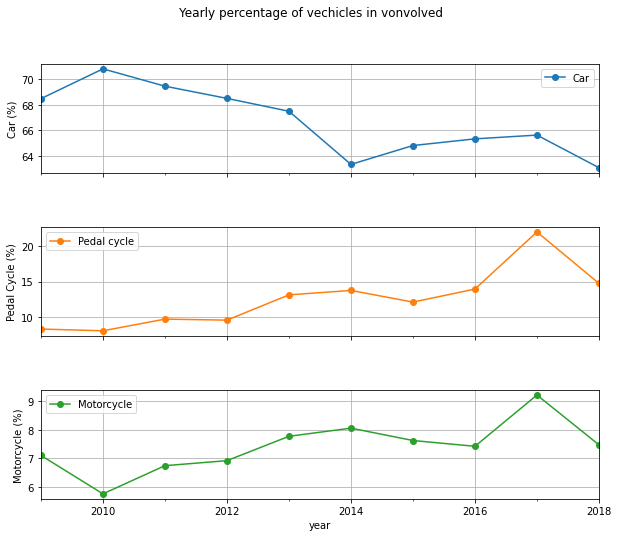

In [100]:
axes=vehicle_percent[['Car','Pedal cycle','Motorcycle']].plot(sharex=True,subplots=True,marker='o',
                                             title ="Yearly percentage of vechicles in vonvolved",
                                                         xlabel="year",
                                                         figsize = (10,8),
                                                         grid=True
                                                        );

plt.subplots_adjust(hspace=0.5) 
axes[0].set_ylabel('Car (%)');
axes[1].set_ylabel('Pedal Cycle (%)');
axes[2].set_ylabel('Motorcycle (%)');

- Car, Pedal cycle and Motorcycle have the highest percentage of involvment in accidents.
- Car stands at the highest percentage, shows a downward trend over the years. 
- Pedal cycle and motorcycle show similar trend over the years, and the trend is upward untill 2017, and afterwards its showing downward trend.

#### Number of accident per year by Age of Casualty

In [101]:
age_percent = (data.resample('Y')["age_of_casualty"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
age_percent.mean()

age_of_casualty
children               9.333440
early working age     24.146915
elderly                7.631911
mature working age     7.436307
prime working age     51.451427
dtype: float64

"plt.subplots_adjust(hspace=1) \naxes[0].set_ylabel('Children (%)');\naxes[1].set_ylabel('early working age (%)');\naxes[2].set_ylabel('elderly (%)');\naxes[3].set_ylabel('mature working age (%)');\naxes[4].set_ylabel('prime working age (%)');\n"

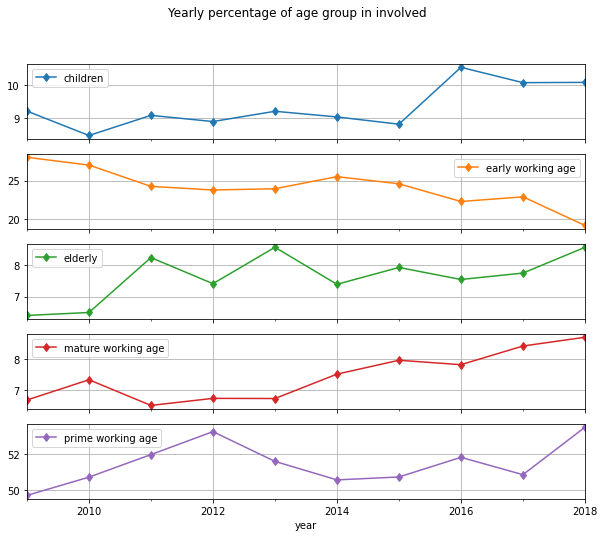

In [103]:
axes=age_percent.plot(subplots=True,
                       sharex=True,
                       marker='d',
                       title ="Yearly percentage of age group in involved",
                       xlabel="year", 
                       figsize = (10,8),
                       grid=True
                        );

'''plt.subplots_adjust(hspace=1) 
axes[0].set_ylabel('Children (%)');
axes[1].set_ylabel('early working age (%)');
axes[2].set_ylabel('elderly (%)');
axes[3].set_ylabel('mature working age (%)');
axes[4].set_ylabel('prime working age (%)');
'''


- Highest accidents met by prime working age people for overall years.
- Next  early working age people and followed by children,elderly and least mature working age. 

#### Number of accident per year by Casualty Serverity

In [104]:
casualty_severity_percent= (data.resample('Y')["casualty_severity"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
casualty_severity_percent.mean()

casualty_severity
Fatal       0.738302
Serious    11.881695
Slight     87.380003
dtype: float64

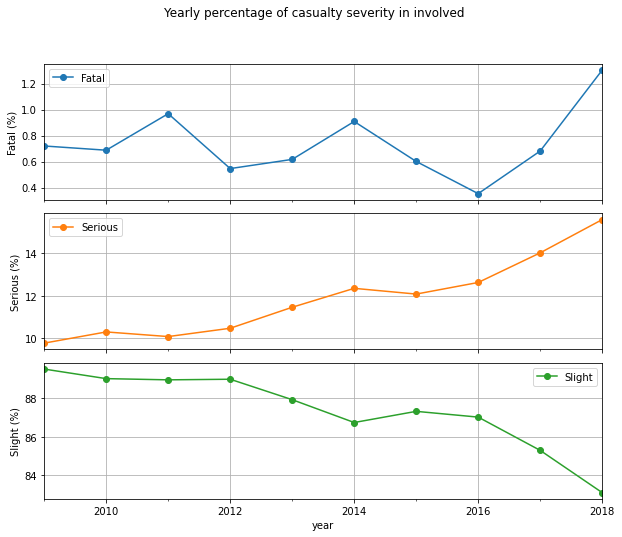

In [105]:
axes=casualty_severity_percent.plot(sharex=True,
                                subplots=True,
                                marker='o',
                                title ="Yearly percentage of casualty severity in involved",
                                xlabel="year",
                                figsize = (10,8),
                                grid=True
                                );
plt.subplots_adjust(hspace=0.1) 
axes[0].set_ylabel('Fatal (%)');
axes[1].set_ylabel('Serious (%)');
axes[2].set_ylabel('Slight (%)');

- Accidents Fetal is up and downs all the years maximum number Fetal happend in year 2018.

- People met with accident and  condition is serious  increased by yearly and reached max in 2018.

- People met with accident and  condition is standard standard for intial years and after continiously decreased.

#### Number of accident per year by Lighting Conditions

In [106]:
lighting_conditions=(data.resample('Y')["lighting_conditions"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
lighting_conditions.mean()

lighting_conditions
darkness: no street lighting                  1.883013
darkness: street lighting unknown             7.465467
darkness: street lights present and lit      21.620664
darkness: street lights present but unlit     0.252832
daylight: street lights present              68.778024
dtype: float64

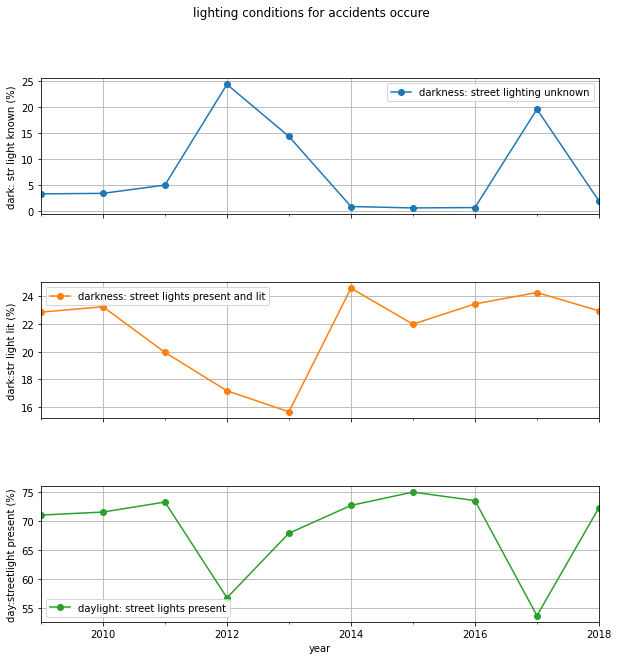

In [107]:
axes=lighting_conditions[['darkness: street lighting unknown',
'darkness: street lights present and lit',
'daylight: street lights present']].plot(sharex=True,
                         subplots=True,
                         marker='o',
                        title ="lighting conditions for accidents occure",
                        xlabel="year",
                        figsize = (10,10),
                        grid=True
                        );
plt.subplots_adjust(hspace=0.5) 

axes[0].set_ylabel('dark: str light known (%)');
axes[1].set_ylabel('dark:str light lit (%)');
axes[2].set_ylabel('day:streetlight present (%)');
                                                         

- Most of the accidents happend daylight street lights present, darkness: street lights present and lit and darkness: street lighting unknown

#### Number of accident per year by Weather Conditions

In [108]:
weather_conditions_percent=(data.resample('Y')["weather_conditions"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
mean_values=weather_conditions_percent.mean().sort_values(ascending=False)
print('Max Accidents occur during:\n',mean_values.nlargest(2))

mean_values

Max Accidents occur during:
 weather_conditions
Fine without high winds       86.18916
Raining without high winds     8.50639
dtype: float64


weather_conditions
Fine without high winds              86.189160
Raining without high winds            8.506390
Unknown                               1.610198
Raining with high winds               1.174488
Fine with high winds                  1.160679
Other                                 0.653504
Snowing without high winds            0.623437
Fog or mist                           0.319803
Snowing with high winds               0.154950
Darkness: street lighting unknown     0.078958
dtype: float64

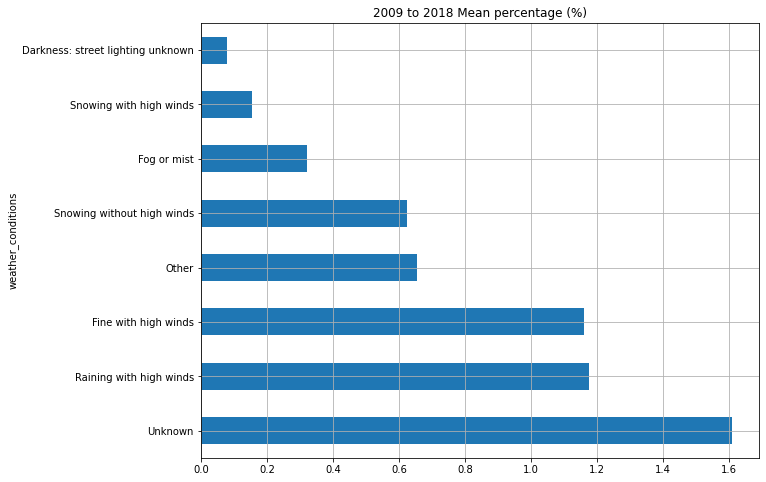

In [109]:
mean_values.iloc[2:].plot(kind='barh',
                        title ="2009 to 2018 Mean percentage (%)",
                        figsize = (10,8),
                        grid=True
                        );

                                                         

- Most of the accidents occur during fine weather conditions (86.2%) without high winds.
- Next contributing weather condition for accidents is Rain (9.68%) combining with and without high winds.
- Fog, mist and snow comditions sums upto less than 2% of the overall accidents over the years.
- Noticeably, high wind has less effect on accidnets as the data was recorded in urban and suburban zones mostly.

#### Number of accident per year by Road Surface

In [110]:
road_surface_percent=(data.resample('Y')["road_surface"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
road_surface_percent.mean()

road_surface
Dry          74.377697
Flood         0.149664
Frost/Ice     1.235073
Snow          0.712036
Wet/Damp     23.585394
dtype: float64

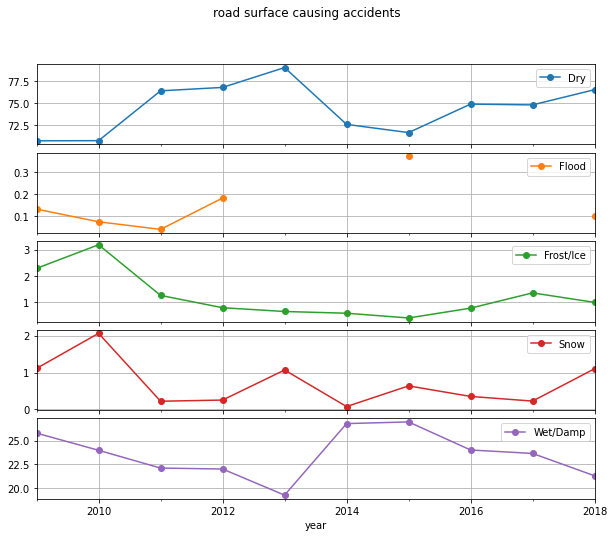

In [111]:
road_surface_percent.plot(sharex=True,
                          subplots=True,
                          marker='o',
                          title ="road surface causing accidents",
                          xlabel="year",
                          figsize = (10,8),
                          grid=True
                        );
plt.subplots_adjust(hspace=0.1) 
axes[0].set_ylabel('Dry (%)');
axes[1].set_ylabel('Flood (%)');
axes[2].set_ylabel('Slight (%)');


- Highest number of accidents happend when the road surface is dry.

- Least  number of accidents happend when there is flooding

#### Highest Number of accident  by month

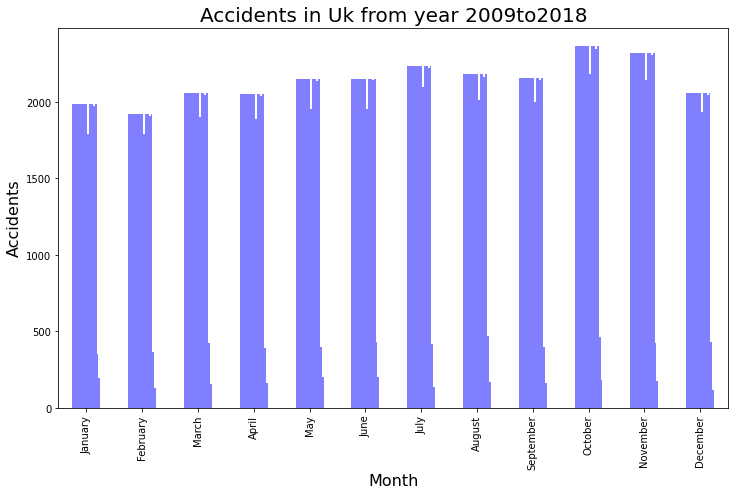

In [112]:
# Number of accident per month
accidents_month=data.groupby([data.index.month]).count()
accidents_month
# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]
accidents_month


# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5,legend=False)

# title and x,y labels
plt.title('Accidents in Uk from year 2009to2018', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Accidents',fontsize=16);

- From the above analysis maxiumn number of accidents are happend in the month of october followed by November.

#### Coverting Easting and Northing to Latitude and Longitude

In [113]:
#By using covert_lonlat method from convertbng.util library converting to logitude and latitude
list_lon_lat = convert_lonlat(data.easting, data.northing)
data['longitude'] = list_lon_lat[0]
data['latitude'] = list_lon_lat[1]

In [114]:
locations = data[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
#print(locationlist)
locationlist[0]

[53.82180298, -1.55955206]

##### All type of vehicle locations Random sample 100

In [115]:
from random import sample
sample_location_100 = sample(locationlist,100)

In [116]:
map = folium.Map(location=[53.82180298, -1.55955206], zoom_start=12)
for point in range(0, len(sample_location_100)):
    folium.Marker(sample_location_100[point], tooltip=data['type_of_vehicle'][point]).add_to(map)
map

##### Car Accident locations Random Sample 100

In [117]:
locations_car = data[data.type_of_vehicle == 'Car'][['latitude', 'longitude']]
locationlist_car = (locations_car[['latitude', 'longitude']]).values.tolist()
len(locationlist_car)
locationlist_car[0]

[53.82180298, -1.55955206]

In [118]:
sample_location_car_100 = sample(locationlist_car,100)

map = folium.Map(location=[53.82180298, -1.55955206], zoom_start=12)
for point in range(0, len(sample_location_car_100)):
    folium.Marker(sample_location_car_100[point]).add_to(map)
map


##### Pedal cycle Accident locations Random Sample 100

In [119]:
#locations_pcycle = data[data.type_of_vehicle == 'Pedal cycle'][['latitude', 'longitude']]
locations_pcycle = data[data.type_of_vehicle.eq("Pedal cycle")][['latitude', 'longitude']]
locationlist_pcycle = (locations_pcycle[['latitude', 'longitude']]).values.tolist()
len(locationlist_pcycle)
locationlist_pcycle[0]

[53.82310283, -1.61337338]

In [120]:
sample_location_pcycle_100 = sample(locationlist_pcycle,100)

map = folium.Map(location=[53.82310283, -1.61337338], zoom_start=12)
for point in range(0, len(sample_location_pcycle_100)):
    folium.Marker(sample_location_pcycle_100[point]).add_to(map)
map

##### Motorcycle cycle Accident locations Random Sample 100

In [121]:
locations_mcycle = data[data.type_of_vehicle == 'Motorcycle'][['latitude', 'longitude']]
locationlist_mcycle = (locations_mcycle[['latitude', 'longitude']]).values.tolist()
len(locationlist_mcycle)
locationlist_mcycle[0]

[53.83762698, -1.64241767]

In [122]:
sample_location_mcycle_100 = sample(locationlist_mcycle,100)

map = folium.Map(location=[53.82310283, -1.61337338], zoom_start=12)
for point in range(0, len(sample_location_mcycle_100)):
    folium.Marker(sample_location_mcycle_100[point]).add_to(map)
map

##### By using pandas_profiling we can read Profile Report

In [123]:
#profileReport(data)

##### Analysis and visualizaion by Class, Severity and Sex of Casualty

In [124]:
data.columns


Index(['reference_number', 'easting', 'northing', 'number_of_vehicles',
       '1st_road_class', 'road_surface', 'lighting_conditions',
       'weather_conditions', 'casualty_class', 'casualty_severity',
       'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle',
       'passenger_type', 'casualty_veh_no', 'longitude', 'latitude'],
      dtype='object')

In [125]:
(data['sex_of_casualty'].value_counts(normalize=True)*100)

Male      58.748488
Female    41.251512
Name: sex_of_casualty, dtype: float64

- Male percentage is involved higher in accidents

In [126]:
df_sex_cas_cls =(data.groupby('sex_of_casualty')['casualty_severity'].value_counts(normalize=True)*100).unstack()
df_sex_cas_cls.style.background_gradient(cmap='Blues')

casualty_severity,Fatal,Serious,Slight
sex_of_casualty,,,
Female,0.482315,8.511443,91.006242
Male,0.896474,13.938509,85.165018


df_sex_cas_cls =(data.groupby('sex_of_casualty')['casualty_severity']["type_of_vechicle].value_counts(normalize=True)*100).unstack()
df_sex_cas_cls.style.background_gradient(cmap='Blues')

- Male serious and Fatal accident casualty percentage is comparetively higher than the Female. 
- A large percentage of accidents casualty involving female is slight and least is Fatal.

In [127]:
df_sex_cas_cls =(data.groupby('sex_of_casualty')['casualty_class'].value_counts(normalize=True)*100).unstack()
df_sex_cas_cls.style.background_gradient(cmap='Blues')

casualty_class,Driver/Rider,Passenger,Pedestrian
sex_of_casualty,,,
Female,45.166581,39.538698,15.294721
Male,67.434992,19.023266,13.541742


- Male drivers are significantly more involved in accidents.
- A large portion of casulaty class for Female consists of Passenger class

###### Gender analysis by type of vehicles
- Overall type of vehicle percentage for each Gender. 

In [128]:
df_sex_cas_cls =(data.groupby('sex_of_casualty')['type_of_vehicle'].value_counts(normalize=True)*100).unstack().T
df_sex_cas_cls.style.background_gradient(cmap='Blues')

sex_of_casualty,Female,Male
type_of_vehicle,,
Agricultural vehicle (includes diggers etc.),0.009458,0.053124
Bus,8.909486,3.599177
Car,78.057316,59.021183
Goods Vehicle,1.295753,4.296434
Minibus,0.293200,0.431636
Mobility Scooter,0.094581,0.059765
Motorcycle,2.118604,11.023308
Other Vehicle,0.283742,0.604290
Pedal cycle,5.315426,16.986520


- Car accident percentage is the highest for both male and female
- Male involvment in Pedal cycle and Motorcycle is significantly higher.


###### Type of vehicle analysis by Gender
- For each type of vehicle the Male and Female percentage 

In [129]:
df_sex_cas_cls =(data.groupby('type_of_vehicle')['sex_of_casualty'].value_counts(normalize=True)*100).unstack()
df_sex_cas_cls.style.background_gradient(cmap='Blues')

sex_of_casualty,Female,Male
type_of_vehicle,,
Agricultural vehicle (includes diggers etc.),11.111111,88.888889
Bus,63.477089,36.522911
Car,48.147716,51.852284
Goods Vehicle,17.474490,82.525510
Minibus,32.291667,67.708333
Mobility Scooter,52.631579,47.368421
Motorcycle,11.889597,88.110403
Other Vehicle,24.793388,75.206612
Pedal cycle,18.012821,81.987179


- Male involvment in car accident is slightly higher than Female.
- Male involvment in Pedal cycle and Motorcycle is significantly higher than Female.

In [130]:
data[data.number_of_vehicles>2]['type_of_vehicle'].value_counts(normalize=True)*100

Car                  83.539343
Goods Vehicle         5.004522
Pedal cycle           3.527284
Motorcycle            3.255954
Taxi/Hire             2.110341
Bus                   1.507386
Other Vehicle         0.482364
Minibus               0.452216
Tram / Light rail     0.090443
Ridden horse          0.030148
Name: type_of_vehicle, dtype: float64

- In multiple vehicle crash Car is the most common vehicle as expected.
- Goods vehicle, Pedal cycle and Motorcycle come next in consecutive orders.
- Among the large vehicles Goods vehicles are more involved in multiple vehicle crash, whereas, Bus, Minibus or Tram are very less involved. 

###### Stats for Casualty Severity 1 
- Below chart shows the percentage of vehicles involved in each class of severity.
- Car has the higest percentage of share for each class of severity. 
- Motorcycle and Pedal cycle also has significant share in all the casualty class. 
- Goods vehicle stands in between Motorcycle and Pedal cycle regarding Fatal accidents.

In [131]:
df_cas_sev_type_veh=(data.groupby('casualty_severity')['type_of_vehicle'].value_counts(ascending=True,normalize=True)*100).unstack().T
df_cas_sev_type_veh=df_cas_sev_type_veh.fillna(0)
df_cas_sev_type_veh.style.background_gradient(cmap='Blues')

casualty_severity,Fatal,Serious,Slight
type_of_vehicle,,,
Agricultural vehicle (includes diggers etc.),0.000000,0.033344,0.035640
Bus,3.225806,3.501167,6.116630
Car,60.752688,50.883628,69.060454
Goods Vehicle,11.290323,2.900967,3.011538
Minibus,0.000000,0.400133,0.374215
Mobility Scooter,0.000000,0.166722,0.062369
Motorcycle,16.666667,21.407136,5.394930
Other Vehicle,1.612903,0.833611,0.414309
Pedal cycle,4.838710,17.305769,11.547200


###### Stats for Casualty Severity 2
- Below chart shows the percentage of class of severity for each vehicle types.
- Most of the accidents for Car are slight in severity.
- For Motorcycle accidents Serious severity is signficanlty higher. 
- Goods vehicle accidents are significantly fatal.

In [132]:
df_type_veh_cas_sev=(data.groupby('type_of_vehicle')['casualty_severity'].value_counts(ascending=True,normalize=True)*100).unstack()
df_type_veh_cas_sev=df_type_veh_cas_sev.fillna(0)
df_type_veh_cas_sev.style.background_gradient(cmap='Blues')

casualty_severity,Fatal,Serious,Slight
type_of_vehicle,,,
Agricultural vehicle (includes diggers etc.),0.000000,11.111111,88.888889
Bus,0.404313,7.075472,92.520216
Car,0.659238,8.902631,90.438131
Goods Vehicle,2.678571,11.096939,86.224490
Minibus,0.000000,12.500000,87.500000
Mobility Scooter,0.000000,26.315789,73.684211
Motorcycle,1.645435,34.076433,64.278132
Other Vehicle,2.479339,20.661157,76.859504
Pedal cycle,0.288462,16.634615,83.076923


- Car is the most involved vehicle in all class of accidents.
- Motorcycle and Goods vehicle comes next

##### Location Analysis 

In [133]:
data.columns

Index(['reference_number', 'easting', 'northing', 'number_of_vehicles',
       '1st_road_class', 'road_surface', 'lighting_conditions',
       'weather_conditions', 'casualty_class', 'casualty_severity',
       'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle',
       'passenger_type', 'casualty_veh_no', 'longitude', 'latitude'],
      dtype='object')

Fatal Accidents Locations

In [134]:
df_fatal_loc=data[data.casualty_severity=='Fatal'][['latitude','longitude']].drop_duplicates()
locations_fatal = df_fatal_loc[['latitude', 'longitude']]
locationlist_fatal = (locations_fatal[['latitude', 'longitude']]).values.tolist()
len(locationlist_fatal)
locationlist_fatal[0]

[53.76988352, -1.57834607]

In [135]:
map = folium.Map(location=[53.76988352, -1.57834607], zoom_start=12)
for point in range(0, len(locationlist_fatal)):
    folium.Marker(locationlist_fatal[point]).add_to(map)
map

In [136]:
df_cas_cls_road_type=(data.groupby('casualty_severity')['1st_road_class'].value_counts(normalize=True)*100).unstack().T
df_cas_cls_road_type=df_cas_cls_road_type.fillna(0)
df_cas_cls_road_type.style.background_gradient(cmap='Blues')

casualty_severity,Fatal,Serious,Slight
1st_road_class,,,
A,51.612903,35.811937,38.542409
B,6.989247,5.968656,5.287776
C,0.000000,0.233411,0.120278
Motorway,4.301075,4.668223,6.833571
Unclassified,37.096774,53.317773,49.215966


In [139]:
data.index


DatetimeIndex(['2009-01-01 00:55:00', '2009-01-02 13:50:00',
               '2009-01-02 13:50:00', '2009-01-02 16:45:00',
               '2009-01-02 17:23:00', '2009-01-02 23:00:00',
               '2009-01-02 23:35:00', '2009-01-03 02:22:00',
               '2009-01-03 03:25:00', '2009-01-03 16:45:00',
               ...
               '2018-12-26 23:10:00', '2018-12-27 14:54:00',
               '2018-12-30 07:25:00', '2018-12-30 09:45:00',
               '2018-12-30 22:56:00', '2018-12-31 13:45:00',
               '2018-12-31 13:45:00', '2018-12-31 13:45:00',
               '2018-12-31 13:45:00', '2018-12-31 16:08:00'],
              dtype='datetime64[ns]', name='Datetime', length=25633, freq=None)

- Most of the Fatal accidents occured on class-A roads. 

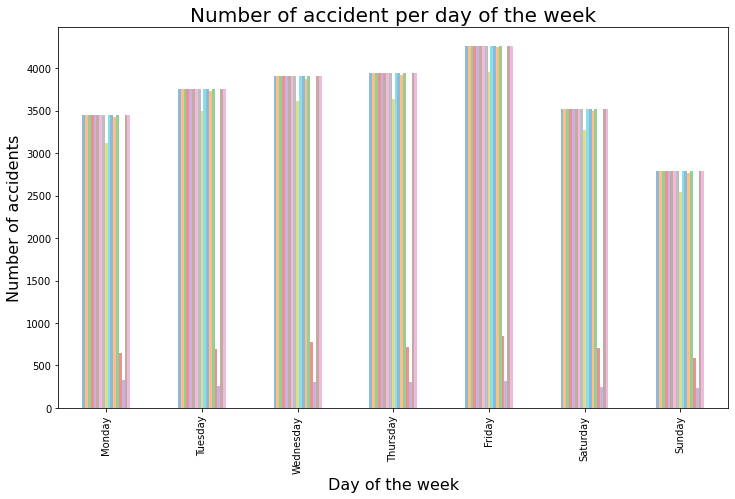

In [170]:
# Number of accident per day of the week
accidents_day = data.groupby(data.index.dayofweek).count()


# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), alpha=0.5,legend=False)

# title and x,y labels
plt.title('Number of accident per day of the week', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

In [171]:
accidents = data.groupby(data.index).count()

#accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = data.groupby(data.index.dayofweek).count()
sundays
'''plt.scatter(sundays.index, sundays, color='green', label='sunday')

# friday accidents
friday = data.groupby(data.index.dayofweek==4).count()
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents by week of day', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=20);
plt.legend()'''

"plt.scatter(sundays.index, sundays, color='green', label='sunday')\n\n# friday accidents\nfriday = data.groupby(data.index.dayofweek==4).count()\nplt.scatter(friday.index, friday, color='red', label='friday')\n\n# Title, x label and y label\nplt.title('Accidents by week of day', fontsize=20)\nplt.xlabel('Date',fontsize=16)\nplt.ylabel('Number of accidents per day',fontsize=20);\nplt.legend()"

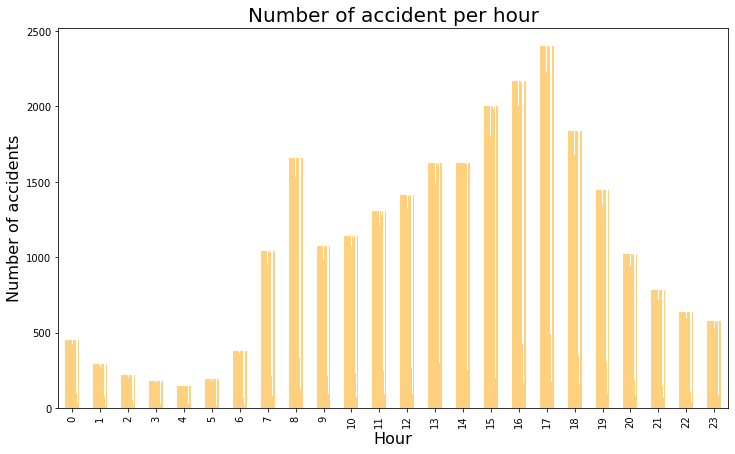

In [169]:
# Number of accident per hour
accidents_hour = data.groupby(data.index.hour).count()

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', legend =False,alpha=0.5)

# title and x,y labels
plt.title('Number of accident per hour', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

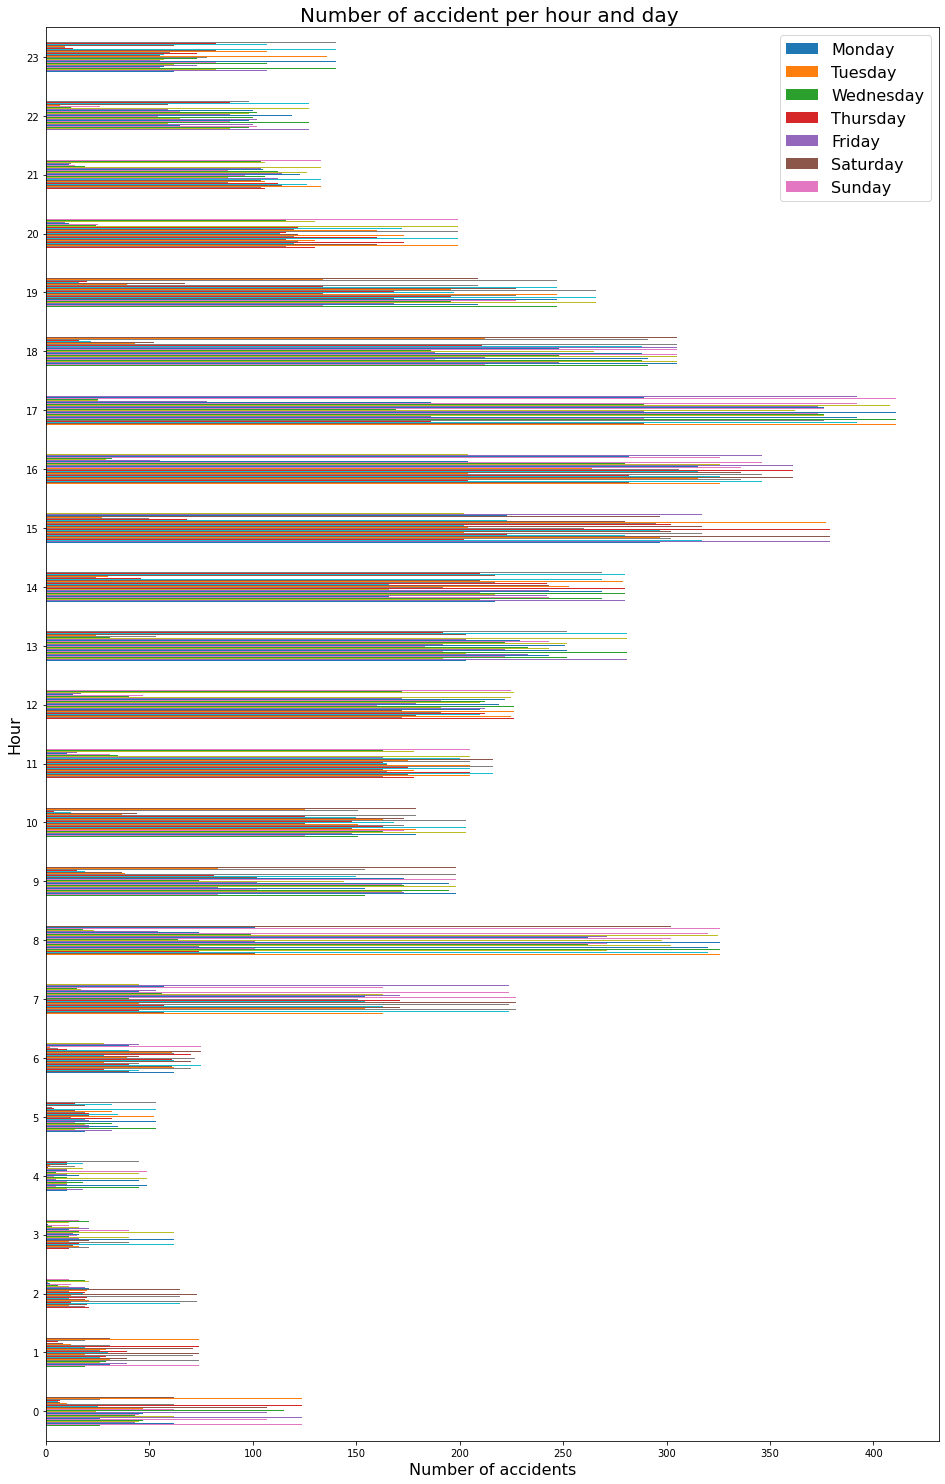

In [167]:
# Number of accident per hour and day
#accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date
accidents_hour_day = data.groupby([data.index.hour.rename('hour'),data.index.dayofweek.rename('day')]).count()


accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Number of accident per hour and day ',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

### Conclusion 
#### Observation summary:
- Most dangerous conditions to drive in uk is dry road surface,daylight: street lights present,fine weather conditions without high winds.
- Car is one met maxium number of accidents.
- prime working age people and male are most affected.
- The most dangerous month is october to drive.
- 
Road Accident has always been a devastating factor of human lives. With the ever increasing number of vehicles it is really important to account for this devasting aspect of human lives. There is further analysis scope with this data if the reason of the accidents are included as well. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de8a8f15-3c85-4deb-b956-051fdca6483d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>